<h1 align="center"> GASSMANN FLUID REPLACEMENT APPLICATION </h3>

<h3 align="center"> GASSMANN EQUATION </h3>
<h3 align="center"> ONE MINERAL ROCK SATURATED BY ONE FLUID </h3>

<h3> STUDENT: MASAPANTA POZO, John </h3>

Wednesday, 9th November, 2020\
Stavanger-Norway

**This python script has been built based on the following enunciate:**

**EXERCISE**

<p style='text-align: justify;'> 

Consider an oil-saturated sandstone reservoir with porosity 30%. Assume for simplicity 100% oil saturation and pure quartz sand. The P-wave velocity is 3050 m/s, the S-wave velocity is 1660 m/s. 


***(b)*** Compute the P-wave velocity, S-wave velocity and density for a brine saturated reservoir.

***(c)*** Compute the P-wave velocity, S-wave velocity and density for a gas saturated reservoir (100% gas saturations).

***(d)*** Plot the brine, oil and gas points in a cross plot with acoustic impedance (AI) as horizontal axis and Vp/Vs ratio as the vertical axis.

**In other words,** the exercise ask for applying the fluid replacement algorithm considering an oil-saturated sandstone reservoir to understand how some properties such as: primary velocities(Vp), secondary velocities (Vs), and Accoustic Impedance (AI) vary if the reservoir were saturated either by brine or gas.
    
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A. GASSMANN FUNCTION I


### Fluid replacement (Constant Porosity and Water Saturation)

**Considerations:**

**1.** One mineral rock\
**2.** 100% Oil-saturated\
**3.** Porosity = 30 %

__DEFINING DATA:__

    poro  = Porosity [fraction]
    Vp    = Primary Velocity [m/s]
    Vs    = Secondary Velocity [m/s]
    Kw    = Brine Bulk Modulus [GPa]
    Ko    = Oil Bulk Modulus [GPa]
    Kg    = Gas Bulk Modulus [GPa]
    Kq    = Quartz Bulk Modulus [GPa]
    Gq    = Quartz Shear Modulus [GPa]
    rho_q = Quartz density [g/ccm]
    Kc    = Clay Bulk Modulus [GPa]
    Gc    = Clay Shear Modulus [GPa]
    rho_c = Clay density [g/ccm]

In [2]:
#INPUTS

#CONSTANT INPUT
Kw    = 2.75
rho_w = 1.025
Ko    = 0.8
rho_o = 0.75
Kg    = 0.1
rho_g = 0.23
Kq    = 37
Gq    = 44
rho_q = 2.65
Kc    = 30
Gc    = 10
rho_c = 2.60

# ADDITIONAL INPUT
poro  = 0.3
Vp_os = 3050      #Primary and secondary velocities measured in an oil saturated sandstone
Vs_os = 1660

In [3]:
#GASSMANN ALGORITHM FUNCTION FOR FLUID REPLACEMENT

def Gassmann(poro, rho_q, rho_o, rho_w, rho_g, Vs_os, Vp_os):
    rho_ws = ((1-poro)*rho_q + poro*rho_w)*1000    #Brine saturated quartz material rock
    rho_os = ((1-poro)*rho_q + poro*rho_o)*1000    #Oil saturated quartz material rock - used for inverted Gassmann Equation
    rho_gs = ((1-poro)*rho_q + poro*rho_g)*1000    #Gas saturated quartz material rock
    
    #Computing Modulus for the oil-saturated rock
    G_os = (Vs_os**2)*rho_os/10**9                       #Shear Modulus for an oil-saturated rock [Gpa]
    M_os = (Vp_os**2)*rho_os/10**9                       #M Modulus for an oil-saturated rock [GPa]
    K_os = M_os - 4*G_os/3                               #Bulk Modulus for an oil-saturated rock [GPa]
    
    #Inverted Gassmann Equation for computing K_dry
    a = K_os*(poro*Kq/Ko+1-poro)-Kq
    b = (poro*Kq/Ko)+(K_os/Kq)-1-poro
    K_dry = a/b                                          #Bulk Modulus for the dry or non-saturated rock [GPa]
    
    #Gassmann Equation for fluid replacement - brine
    K_fluids = [Ko, Kg, Kw]
    K_fs_mat = []
    for K_f in K_fluids:
        c = (1-K_dry/Kq)**2
        d = poro/K_f + (1-poro)/Kq - K_dry/Kq**2
        K_s = K_dry + c/d
        K_fs_mat.append(K_s)                            #Bulk Modulus for an oil, gas, and brine-saturated rock, respectively [GPa]
    
    M_fs_mat = []
    for K_fs in K_fs_mat:
        M_fs = K_fs + 4*G_os/3
        M_fs_mat.append(M_fs)

    rho_mat = [rho_os, rho_gs, rho_ws]
    Vp_mat = []
    for i in range(len(rho_mat)):      
        Vp_s = ((M_fs_mat[i]*10**9)/(rho_mat[i]))**(1/2)
        Vp_mat.append(Vp_s)                            #P-Velocities for oil, gas, and brine-saturated rock, respectively [GPa]
    
    Vs_mat = []
    for i in range(len(rho_mat)):      
        Vs_s = ((G_os*10**9)/(rho_mat[i]))**(1/2)
        Vs_mat.append(Vs_s)                            #S-Velocities for gas and brine-saturated rock, respectively [GPa]
          
    AI_mat = []                                       #Acoustic Impedance and Vp/Vs ratio Calculation
    Vp_Vs_mat = []
    for i in range(len(Vp_mat)):
        AI_s = Vp_mat[i]*rho_mat[i]
        AI_mat.append(AI_s)
        
        Vp_Vs = Vp_mat[i]/Vs_mat[i]
        Vp_Vs_mat.append(Vp_Vs)

    results = [poro, AI_mat[0], AI_mat[1], AI_mat[2], Vp_Vs_mat[0], Vp_Vs_mat[1], 
               Vp_Vs_mat[2], rho_mat[0], rho_mat[1], rho_mat[2],
              Vp_mat[0], Vp_mat[1], Vp_mat[2], Vs_mat[0], Vs_mat[1], Vs_mat[2]]
    return results

In [4]:
#Calling Gassmann Function with porosity = 0.3

results = Gassmann(poro, rho_q, rho_o, rho_w, rho_g, Vs_os, Vp_os)

labels = ["Porosity = ", "AI_oil = ", "AI_gas = ", "AI_brine = ", "Vs/Vs_oil = ", "Vs/Vs_gas = ",
          "Vs/Vs_brine = ", "Density oil-sat rock = ", "Density gas-sat rock = ", "Density brine-sat rock = ", 
         "Vp_oil = ", "Vp_gas = ", "Vp_brine = ", "Vs_oil = ", "Vs_gas = ", "Vs_brine = "]

for i in range(len(results)):
    r = labels[i] + str(round(results[i], 2))
    print(r)

Porosity = 0.3
AI_oil = 6344000.0
AI_gas = 5914256.71
AI_brine = 6945951.76
Vs/Vs_oil = 1.84
Vs/Vs_gas = 1.78
Vs/Vs_brine = 1.97
Density oil-sat rock = 2080.0
Density gas-sat rock = 1924.0
Density brine-sat rock = 2162.5
Vp_oil = 3050.0
Vp_gas = 3073.94
Vp_brine = 3212.0
Vs_oil = 1660.0
Vs_gas = 1725.99
Vs_brine = 1628.03


Note: The size of the circles in the plot are 200 times proportional to the porosity.
In other words, the bigest ones represent the highest posorities values and vice versa


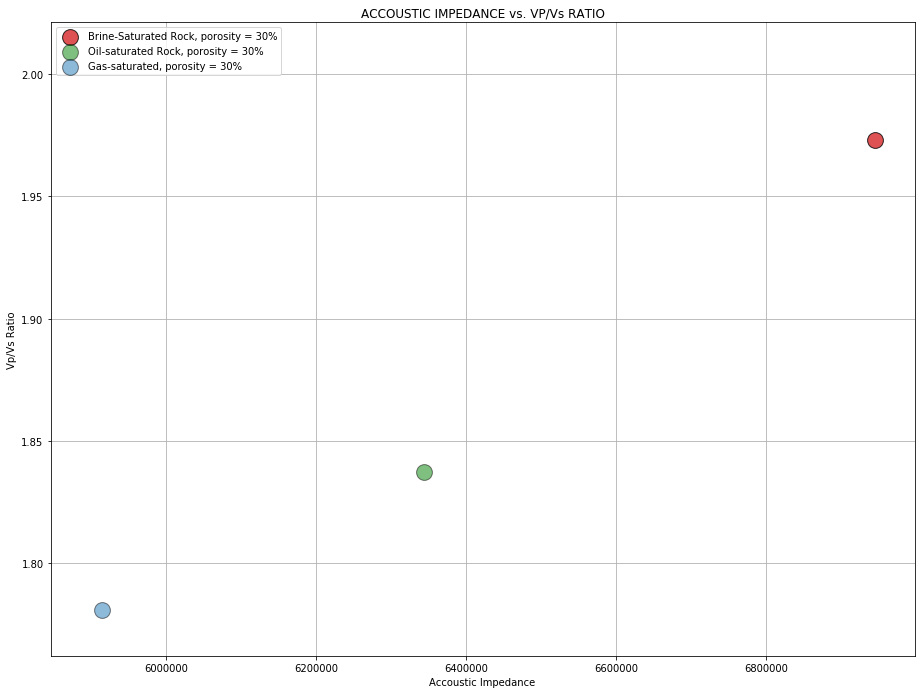

In [5]:
#Plotting

#Plotting Results AI versus VP/VS for brine, oil and gas saturated rocks with 30% porosity

fig, ax = plt.subplots()
                                 
ax.scatter(results[3], results[6], c="tab:red", s=250,
               alpha=0.8, edgecolors='black')
ax.scatter(results[1], results[4], c="green", s=250,
               alpha=0.5, edgecolors='black')
ax.scatter(results[2], results[5], c="tab:blue", s=250,
               alpha=0.5, edgecolors='black')

plt.xlabel('Accoustic Impedance'); plt.ylabel('Vp/Vs Ratio'); plt.title('ACCOUSTIC IMPEDANCE vs. VP/Vs RATIO')
ax.legend(["Brine-Saturated Rock, porosity = 30%", "Oil-saturated Rock, porosity = 30%", "Gas-saturated, porosity = 30%"], loc = 'upper left')
ax.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
#plt.show()

print("""Note: The size of the circles in the plot are 200 times proportional to the porosity.
In other words, the bigest ones represent the highest posorities values and vice versa""")